# Loading the MNIST dataset

scikit-learn provides helper functions to download popular datasets

In [1]:
%xmode Plain

Exception reporting mode: Plain


In [2]:
#%%memit
#from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784',version=1)

In [3]:
#mnist in this case is a Bunch, it is a container object exposing keys as attributes
#A Bunch extends dictionaries by enabling values to be accessed by key bunch['key'],bunch.key
#mnist.keys()

There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

In [4]:
#X, y = mnist["data"], mnist["target"]
#X.to_csv('mnist_features.csv',mode='w',chunksize=35000)
#y.to_csv('mnist_target.csv')
#y.to_csv?

In [5]:
#Created dataset because fetch_openml is taking too long to compute
import pandas as pd

X = pd.read_csv('mnist_features.csv', index_col=0)

In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
y = pd.read_csv('mnist_target.csv',index_col=0,dtype='int64')

In [8]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [9]:
#full_df = X.join(y, how='inner')
#full_df.shape

In [10]:
#full_df.to_csv('mnist_dataset.csv')

# Sample Digit

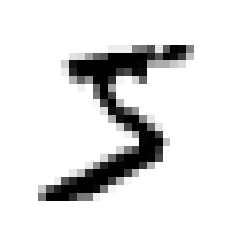

In [11]:
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy() 
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [12]:
y.iloc[0].values

array([5], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]

The training set is already shuffled so all cross-validation folds will be similar

Shuffling may be a bad idea in some contexts—for example, if you are working on time series data (such as stock market prices or weather conditions). We will explore this in the next chapters.


# Training a Binary Classifier

This classifier tries to identfiy the digit '5'

A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals
with training instances independently, one at a time

The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

In [14]:
# The operation below will result in True/False values, which are internally binary values 1/0 hence the binary classifier
y_train_5 = pd.array((y_train == 5),dtype='bool').reshape(60000,)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

C:\Users\McArthur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor

## Measuring Accuracy Using Cross-validation

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#To perform Stratified sampling to produce folds that are adequately
#representative of each class

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))
                            
            

0.96465
0.9634
0.95575


In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv= 3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.base import BaseEstimator
import numpy as np
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        #Predict ZERO/False/Not 5 for each instance i.e y_pred
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

Even if the model guesses that all the numbers are NOT 5, it will be correct over 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for ***classifiers***, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others)

# Confusion Matrix

The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would
look in the fifth row and third column of the confusion matrix.

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3)

Just like the cross_val_score() function, cross_val_predict()
performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).


<AxesSubplot:>

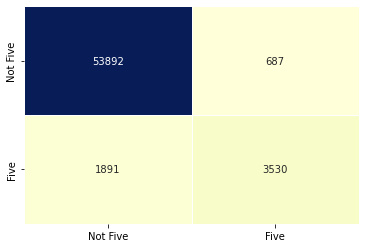

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_train_5, y_train_pred)
sns.heatmap(cm,cmap='YlGnBu',
            cbar=False,annot=True,
            fmt='d',linewidths=1.0,
            xticklabels=['Not Five','Five'],
            yticklabels=['Not Five','Five'],
            )

A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

 

In [23]:
perfect_clf_cm = np.array([[54579,0],[0, 5421]])
perfect_clf_cm.shape

(2, 2)

<AxesSubplot:>

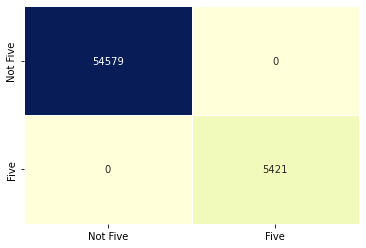

In [24]:
sns.heatmap(perfect_clf_cm,cmap='YlGnBu',
            cbar=False,annot=True,
            fmt='d',linewidths=1.0,
            xticklabels=['Not Five','Five'],
            yticklabels=['Not Five','Five'],
           )

# Precision and Recall

The **precision** of the classifier is the *accuracy* of the positive predictions.

It is typically used along with another metric named
**recall**, also called sensitivity or the true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

The 5-detector does not look as shiny as it did when assessed by its accuracy. When it claims an image represents a 5, it is correct only 83.7% of the time. Moreover, it only detects 65.1% of the 5s

## F1 Score

The F1 score is the harmonic mean of precision and recall. Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F score if both recall and precision are high.

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall

In [27]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off

Raising the threshold  increases the precision. Conversely, lowering the threshold increases recall and reduces precision.

Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then use any threshold you want to make predictions based on those scores:


In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\McArthur\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

## Selecting Threshold

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [31]:
thresholds.shape

(59966,)

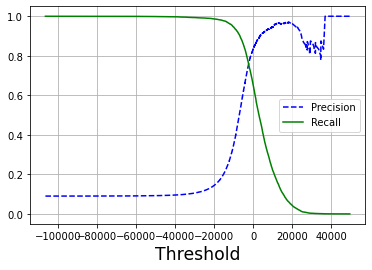

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.xlabel("Threshold",size='xx-large')
    plt.grid()
   # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Another way to select a good precision/recall trade-off is to plot precision directly against recall

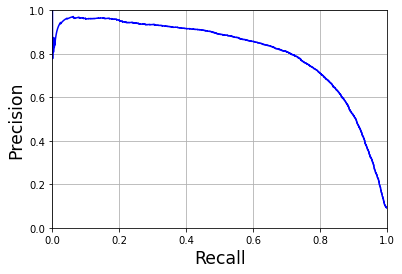

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("Recall",size='xx-large')
    plt.ylabel("Precision", size='xx-large')
    plt.grid()
    plt.xlim(left=0,right=1)
    plt.ylim(top=1,bottom=0)
   # highlight the threshold and add the legend, axis label, and grid
plot_precision_vs_recall(precisions, recalls)

Suppose you decide to aim for 90% precision, you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give you the first index of the maximum value, which in this case means the first True value)

In [34]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

3370.0194991439557


To make predictions (on the training set for now), instead of calling the classifier’s predict() method, you can run this code

In [35]:
#Prediction
y_train_pred_90 = (y_scores >= threshold_90_precision)

#Predictions's precision and recall
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [36]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

It is fairly easy to create a classifier with virtually any precision you want: just set a high enough threshold, and you’re done. 

**However, a high-precision classifier is not very useful if its recall is too low**


## The ROC Curve
The *receiver operating characteristic* (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (recall) against the false positive rate (FPR).

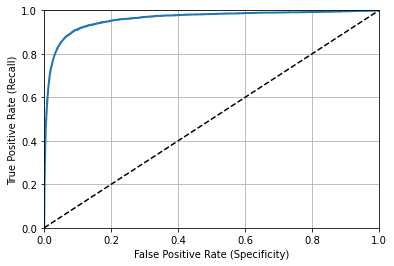

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr,tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2,label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid()
    plt.ylabel("True Positive Rate (Recall)")
    plt.xlabel("False Positive Rate (Specificity)")
    plt.xlim(left=0,right=1)
    plt.ylim(top=1,bottom=0)
    
plot_roc_curve(fpr, tpr)
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from
that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

As a rule of thumb, you should prefer the PR curve whenever the positive class is **rare** or when you care more about the false positives than the false negatives (precision). 

Otherwise, use the ROC curve. For example, looking at the previous
ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non5s). 

In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-left corner) i.e low precision


# Training a Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method='predict_proba')
y_probas_forest.shape

(60000, 2)

In [40]:
#predict_proba returns an array
y_scores_forest = y_probas_forest[:,1] # proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

## ROC Curve

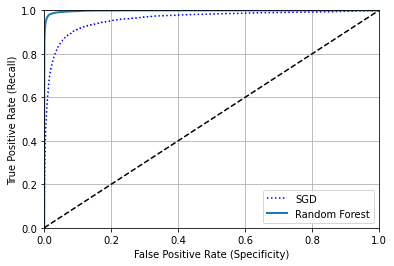

In [41]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.xlim(left=0,right=1)
plt.ylim(top=1,bottom=0)
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## PR Curve

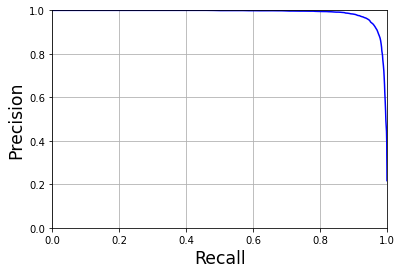

In [43]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_vs_recall(precision, recall)